In [1]:
import model
import os
from option import args
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import data
import utils
import numpy as np


number of common Subjects  171


/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ids = utils.get_ids()
ids.sort()
args.model = 'dmri_rcan'
args.model_type = '3d'
offset = 50
args.no_vols = 10
args.growth=32
args.test_vols = 2
total_vols = args.no_vols+args.test_vols
temp = ids[:args.no_vols]
temp.extend(ids[offset:args.test_vols+offset])
ids = temp

In [3]:
loader = data.Data(args,ids= ids)

Loading Done


In [4]:
len(loader.training_dataset)

963

In [5]:
tm = next(iter(loader.training_data))

In [6]:
for i in range(2):
    print(tm[i].shape)

print(tm[2],tm[3])


torch.Size([1, 32, 32, 8, 7])
torch.Size([1, 54, 51, 13, 5])
tensor([[1.7000, 1.6000, 1.6000]], dtype=torch.float64) [tensor([[   5., 2995., 1005., 1000.,  995., 3010., 1990.]],
       dtype=torch.float64), tensor([[[ 0.5504, -0.6384,  0.5380],
         [-0.8719, -0.4870, -0.0522],
         [ 0.1082, -0.8352, -0.5391],
         [ 0.9303, -0.3669,  0.0040],
         [-0.0087,  0.9410, -0.3383],
         [ 0.4909,  0.0722, -0.8682],
         [ 0.3497,  0.0127,  0.9368]]], dtype=torch.float64)]


In [7]:
lr_tensor = torch.permute(tm[0], (0,4,1,2,3))
hr_tensor = torch.permute(tm[1], (0,4,1,2,3))

In [8]:
from model.models import ConvBlock_3d

In [9]:
blk = ConvBlock_3d(in_chans = 7,out_chans = 32)

In [10]:
blk(lr_tensor).shape,lr_tensor.shape

(torch.Size([1, 39, 32, 32, 8]), torch.Size([1, 7, 32, 32, 8]))

In [11]:
import model.rdn as rdn

In [12]:
encoder = rdn.make_rdn(enc = 'rdn')

In [13]:
encoder(lr_tensor).shape,lr_tensor.shape

(torch.Size([1, 16, 32, 32, 8]), torch.Size([1, 7, 32, 32, 8]))

In [14]:
encoder = rdn.make_rdn(enc = 'r')

In [15]:
encoder(lr_tensor).shape,lr_tensor.shape,hr_tensor.shape

(torch.Size([1, 16, 32, 32, 8]),
 torch.Size([1, 7, 32, 32, 8]),
 torch.Size([1, 5, 54, 51, 13]))

In [16]:
from model.arb_decoder import ImplicitDecoder_3d

In [17]:
decoder = ImplicitDecoder_3d(in_channels = 16)

In [18]:
buf = decoder(encoder(lr_tensor),size = [11, 45, 48])

torch.Size([1, 4, 11, 45, 48]) torch.Size([1, 432, 11, 45, 48])


/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3488.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [20]:
buf[0].shape

torch.Size([1, 5, 11, 45, 48])

In [26]:
buf[0][0,4:,...].shape

torch.Size([1, 11, 45, 48])

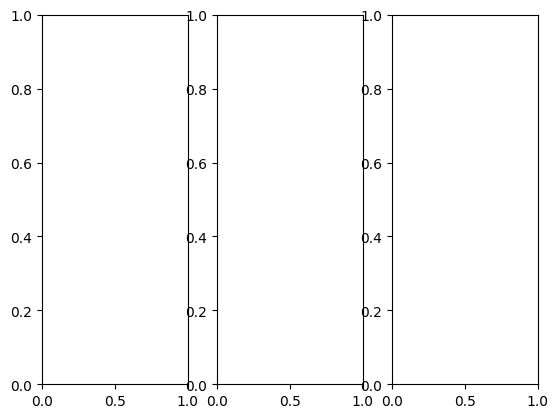

In [27]:

fig ,ax = plt.subplots(1,3)
ax.imshow(lr_tensor[0,])